In [6]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# EJERCICIOS
### EJERCICIO 1
Estimar la entropíade una distribución uniforme U(-3, 3) y de una distribución gaussiana N(0, 1)


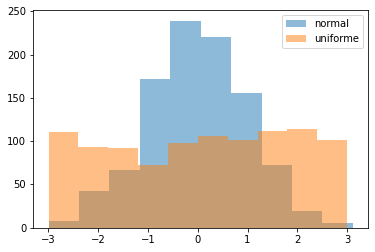

In [7]:
#crear muestras y histograma
# N(0, 1)
muestra_normal = np.random.normal(loc=0, scale=1, size=1000)
# U(-3, 3)
muestra_uniforme = np.random.uniform(low=-3, high=3, size=1000)


plt.hist(muestra_normal, alpha=0.5, label='normal')
plt.hist(muestra_uniforme, alpha=0.5, label='uniforme')
plt.legend()
plt.show()

In [28]:
def marg(x, anch):
    """Cálculo de marginal. """

    p_x, bin_edges = np.histogram(x, anch)
    p_x = p_x/len(x)
    return p_x, bin_edges[1]-bin_edges[0]


def h(p_x, anch):
    """Cálculo de entropía de una variable. """
    h = 0
    for p in p_x:
        h -= p*log2(p/anch) #/anch para que de la misma entropia para cualquier ancho de bins

    return h

print(" ------- CON ANCHO 6 DE BINS -------")
#normal:
marg_n, anch_n = marg(muestra_normal, 6)
h_n = h(marg_n, anch_n)
print(f'H(muestra normal) = {round(h_n, 3)}')

#uniforme
marg_u, anch_u = marg(muestra_uniforme, 6)
h_u = h(marg_u, anch_u)
print(f'H(muestra uniforme) = {round(h_u, 3)}') #obs= tiene sentido que sea más grande porque es más dificil predecir donde cae una muestra


print("\n ------- CON ANCHO 12 DE BINS -------")
#normal:
marg_n, anch_n = marg(muestra_normal, 12)
h_n = h(marg_n, anch_n) 
print(f'H(muestra normal) = {round(h_n, 3)}')

#uniforme
marg_u, anch_u = marg(muestra_uniforme, 12)
h_u = h(marg_u, anch_u)
print(f'H(muestra uniforme) = {round(h_u, 3)}')


print("\n ------- CON ANCHO 20 DE BINS -------")
#normal:
marg_n, anch_n = marg(muestra_normal, 20)
h_n = h(marg_n, anch_n) 
print(f'H(muestra normal) = {round(h_n, 3)}')

#uniforme
marg_u, anch_u = marg(muestra_uniforme, 20)
h_u = h(marg_u, anch_u)
print(f'H(muestra uniforme) = {round(h_u, 3)}')

 ------- CON ANCHO 6 DE BINS -------
H(muestra normal) = 2.079
H(muestra uniforme) = 2.576

 ------- CON ANCHO 12 DE BINS -------
H(muestra normal) = 2.022
H(muestra uniforme) = 2.568

 ------- CON ANCHO 30 DE BINS -------
H(muestra normal) = 2.022
H(muestra uniforme) = 2.565


### EJERCICIO 2
Estimar la entropía de la U[-3, 3] y de una N(0, 1), sacando muestras de la distribución N(3, 1) 


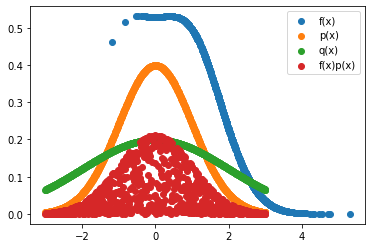

In [9]:
#sampling

def proba_norm(esp, var):
    def p(x): #normal 2, 1
        return (1/(var * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - esp) / var) ** 2)
    return p

def f(p, x): #normal 0, 1
    return -p(x)*np.log2(p(x))


cant_bins = 6


x2 = np.linspace(-3, 3, 1000)
# aux = (np.max(x) -np.min(x))/cant_bins
# centros_bins = np.array([ aux/2 + i*aux  for i in range(cant_bins)])
p = proba_norm(0, 1)
p_x = p(x2)
#p_x = marg(x, cant_bins)

#h_px = h( marg(p_x, 6))
#print(f'Entropía p_x: {h_px}')

x = np.random.normal(loc=2, scale=1, size=1000)
f_x = f(p, x) 
# h_fx = h( marg(f_x, 6))
# print(f'Entropía f_x: {h_fx}')

fp_x = p_x*f_x
# h_fpx = h( marg(fp_x, 6))
# print(f'Entropía f_x*p_x: {h_fpx}')

q = proba_norm(0, 2)
q_x = q(x2)

def graph_todo(f, p, q, fp, x1, x2):
    plt.figure()
    plt.scatter(x1, f, label='f(x)')
    plt.scatter(x2, p, label='p(x)')
    plt.scatter(x2, q, label='q(x)')
    plt.scatter(x2, fp, label='f(x)p(x)')
    plt.legend()
    plt.show()
    plt.close()
    
graph_todo(f_x, p_x, q_x, fp_x, x, x2)


### EJERCICIO 3
Se obtienen las siguientes muestras de dos normales, calcular la primer corrección de la mezcla con el algoritmo EM. Con el algoritmo EM obtener la estimación de los parámetros de las distribuciones.

### EJERCICIO 4
KALMAN

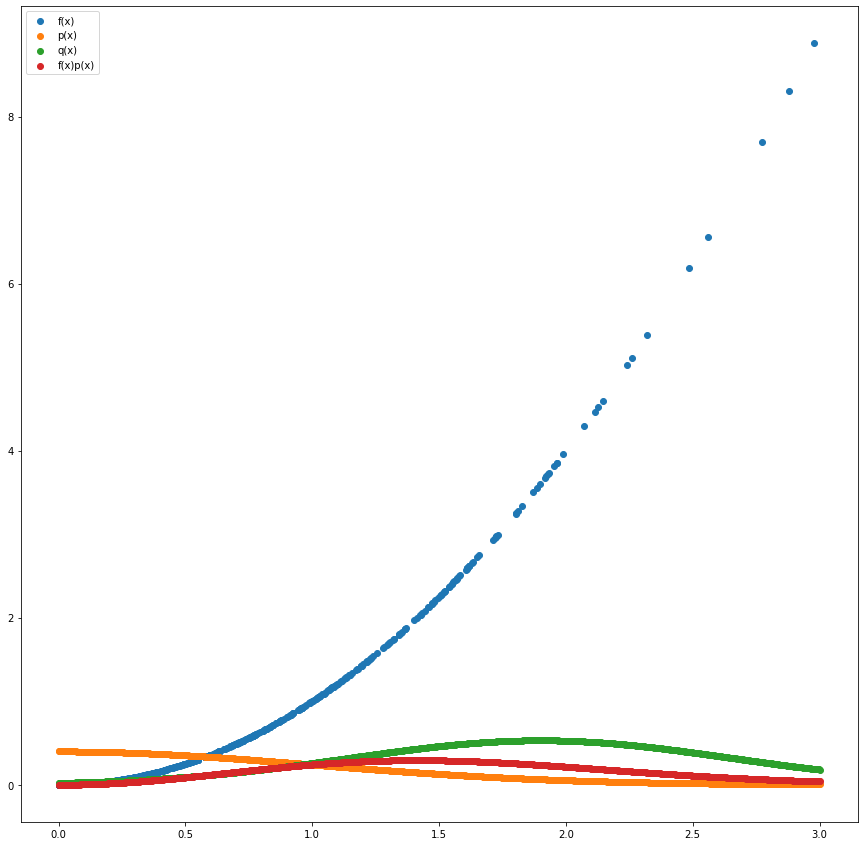

In [10]:
def f(x):
    return x**2

def muestra_norm(e, s):
    muestra = np.random.normal(e, s, 10000)
    rango_min = 0
    rango_max = 3
    muestra_recortada = np.clip(muestra, rango_min, rango_max)
    return np.array(muestra_recortada[:1000])

def graph_todo(f, p, q, fp, x1, x2):
    plt.figure(figsize=(15, 15))
    plt.scatter(x1, f, label='f(x)')
    plt.scatter(x2, p, label='p(x)')
    plt.scatter(x2, q, label='q(x)')
    plt.scatter(x2, fp, label='f(x)p(x)')
    plt.legend()
    plt.show()
    plt.close()
    

#muestra de f(x) con proba p(x)
esp_p = 0
var_p = 1
x1 = muestra_norm(esp_p, var_p) #p(x) - N(0, 1)
f_px = f(x1)

#p(x)
x2 = np.linspace(0, 3, 1000)
pdf_p = (1/(var_p * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x2 - esp_p) / var_p) ** 2)

#f(x)p(x)
fp_x = f(x2)*pdf_p

#q(x)
esp_q = 1.9
var_q = 0.75
pdf_q = (1/(var_q * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x2 - esp_q) / var_q) ** 2)

graph_todo(f_px, pdf_p, pdf_q, fp_x, x1, x2)



